<a href="https://colab.research.google.com/github/kenzylcarr/PortfolioProjects/blob/main/Student_Habits_vs_Academic_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and CSV File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import files

uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


## Reading Tabular Data
The following function reads the imported csv file:

In [2]:
data = pd.read_csv("student_habits_performance.csv")

### Dataset Description
Student Habits Performance Dataset contains 16 columns, each are:
1. student_id: Contains sample student identification.
2. age: Student's age, ranging between 17 to 24 years old.
3. gender: Student's selected gender identity.
    - Male
    - Female
    - Other
4. study_hours: Average number of hours spent studying per day.
5. social_media_hours: Average number of hours spent on social media per day.
6. netflix_hours: Average number of hours spent watching Netflix per day.
7. part_time_job: Yes or no.
8. attendance_percentage: Class attendance percentage.
9. sleep_hours: Average number of hours spent sleeping per day.
10. diet_quality: Quality of the student's diet.
    - Good
    - Fair
    - Poor
11. exercise_frequency: Days per week spent exercising.
12. parental_education_level: Level of education received by parent.
    - None
    - High School
    - Bachelor
    - Master
13. internet_quality: Rating of student's internet quality.
    - Good
    - Average
    - Poor
14. mental_health_rating: Rating of student's mental health, on a scale from 1 to 10, where 1 is bad and 10 is good.
15. extracurricular_participation: Yes or no.
16. exam_score: Average score on the student's exam.


In [3]:
data

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


## Data Preparation!
Checking for missing data:

In [4]:
# Loop through the dataset and check if anything is missing

for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

student_id - 0%
age - 0%
gender - 0%
study_hours_per_day - 0%
social_media_hours - 0%
netflix_hours - 0%
part_time_job - 0%
attendance_percentage - 0%
sleep_hours - 0%
diet_quality - 0%
exercise_frequency - 0%
parental_education_level - 9%
internet_quality - 0%
mental_health_rating - 0%
extracurricular_participation - 0%
exam_score - 0%


There is approximately 9% of the data missing for parental education level. Removing any null values from the dataset.

In [5]:
data.drop_duplicates()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


Checking the data type of the columns:

In [6]:
print(data.dtypes)

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


### Ordering the data by hours spent studying per day

In [7]:
data.sort_values(by=['study_hours_per_day'], inplace=False, ascending=False)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
455,S1455,19,Male,8.3,3.3,2.6,Yes,86.6,6.5,Fair,5,High School,Average,9,No,100.0
797,S1797,23,Male,8.2,2.2,1.5,No,83.1,5.7,Poor,2,Master,Good,5,Yes,100.0
875,S1875,19,Female,7.6,3.0,2.9,No,99.4,4.8,Poor,0,High School,Good,3,No,100.0
774,S1774,18,Female,7.5,3.6,1.9,Yes,85.9,7.8,Fair,6,Bachelor,Average,3,No,100.0
489,S1489,21,Female,7.4,3.6,1.3,No,91.6,7.1,Good,3,High School,Good,6,Yes,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,S1195,18,Female,0.0,2.8,1.6,No,93.4,5.8,Fair,0,Bachelor,Good,5,No,26.7
590,S1590,17,Female,0.0,4.6,1.2,No,96.2,6.1,Poor,6,Bachelor,Average,7,No,42.0
186,S1186,18,Female,0.0,1.9,1.5,No,82.4,5.6,Fair,3,Bachelor,Average,8,No,55.2
958,S1958,18,Male,0.0,3.8,1.3,Yes,89.5,5.7,Good,5,High School,Average,5,No,31.1


### Checking for Outliers

<Axes: >

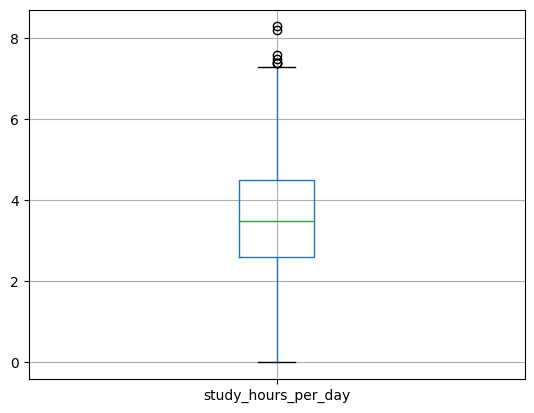

In [8]:
data.boxplot(column=['study_hours_per_day'])

### Removing Outliers from Dataset

In [9]:
z_scores = stats.zscore(data['study_hours_per_day'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

<Axes: >

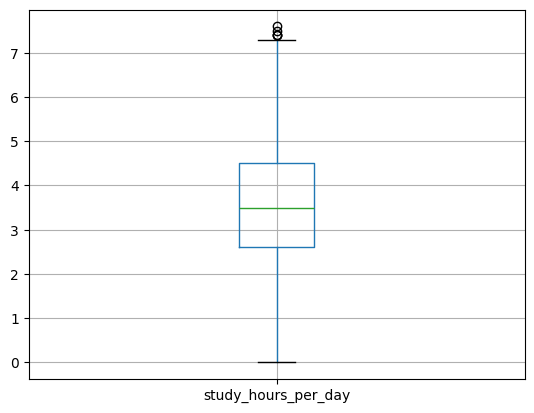

In [10]:
data.boxplot(column=['study_hours_per_day'])

## Data Exploration!
In my analysis, I will explore and answer the correlation of the student's exam grade to factors such as: number of hours spent studying, sleeping, using social media and Netflix.

In [21]:
# Selecting columns of interest

columns_of_interest = ['exam_score', 'study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours']
subset = data[columns_of_interest]

correlation_matrix = subset.corr()
print("Correlation Matrix:\n", correlation_matrix.round(3))

Correlation Matrix:
                      exam_score  study_hours_per_day  sleep_hours  \
exam_score                1.000                0.825        0.123   
study_hours_per_day       0.825                1.000       -0.026   
sleep_hours               0.123               -0.026        1.000   
social_media_hours       -0.168                0.019        0.018   
netflix_hours            -0.173               -0.033       -0.001   

                     social_media_hours  netflix_hours  
exam_score                       -0.168         -0.173  
study_hours_per_day               0.019         -0.033  
sleep_hours                       0.018         -0.001  
social_media_hours                1.000          0.011  
netflix_hours                     0.011          1.000  


There is a strong positive correlation between study hours per day and exam score, indicating that students who study more tend to perform better on exams. In contrast, the correlation between the time spent on social media and Netflix, with exam score is weak and negative, suggesting that increased screen time could be associated with lower performance. Surprisingly, the number of hours student sleep shows only a weak positive correlation with exam score, indicating that while sleep is a factor in student's academic performance, it is not as influential as study habits.

## Data Visualization

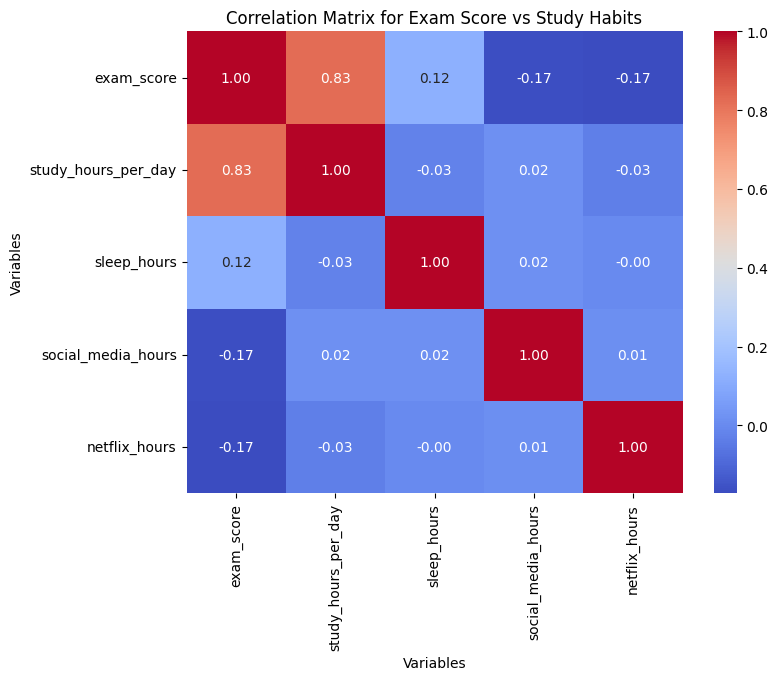

In [28]:
correlation_matrix = data[columns_of_interest].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Exam Score vs Study Habits")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()


**Conclusion:** The factors contributing to the success of a student's performance is the time spent studying, as it has the highest correlation.

## Data Exploration (continued)

While we have determined the study-related habits that contribute to a student's success, there are still a few other lifestyle factors that are worth exploring.


* What are the student's dietary habits? Does a good diet relate to higher academic achievement?

* Does the student have a part time job, or participate in extra-curricular activities?

* Does higher parental education correlate with better academic performance?

* How is the student's internet quality? Could limited internet access impact a student's learning?

* Is there a relationship between good mental health and high exam scores?

These questions will guide the next phase of our analysis, and offer deeper insight into how personal and environmental factors may influence student performance beyond just study time.
